### The German Traffic Sign Benchmark

Student Name 1: ...

Student Name 2: ...

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [0]:
!wget -c http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip
!unzip FullIJCNN2013.zip

--2019-03-31 16:58:53--  http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip
Resolving benchmark.ini.rub.de (benchmark.ini.rub.de)... 134.147.122.15
Connecting to benchmark.ini.rub.de (benchmark.ini.rub.de)|134.147.122.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘FullIJCNN2013.zip’

FullIJCNN2013.zip   100%[===================>]   1.55G  6.76MB/s    in 5m 22s  

2019-03-31 17:04:16 (4.92 MB/s) - ‘FullIJCNN2013.zip’ saved [1661866983/1661866983]

Archive:  FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN201

In [0]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

list_files("FullIJCNN2013")      

FullIJCNN2013/
    00251.ppm
    00377.ppm
    00180.ppm
    00875.ppm
    00350.ppm
    00187.ppm
    00471.ppm
    00493.ppm
    00729.ppm
    00799.ppm
    00266.ppm
    00016.ppm
    00790.ppm
    00093.ppm
    00614.ppm
    00862.ppm
    00189.ppm
    00475.ppm
    00850.ppm
    00499.ppm
    00889.ppm
    00893.ppm
    00757.ppm
    00463.ppm
    00553.ppm
    00478.ppm
    00296.ppm
    00258.ppm
    00157.ppm
    00720.ppm
    00536.ppm
    00503.ppm
    00067.ppm
    00431.ppm
    00054.ppm
    00891.ppm
    00805.ppm
    00313.ppm
    00462.ppm
    00324.ppm
    00506.ppm
    00601.ppm
    00118.ppm
    00602.ppm
    00060.ppm
    00199.ppm
    00284.ppm
    00707.ppm
    00426.ppm
    00582.ppm
    00012.ppm
    00254.ppm
    00014.ppm
    00882.ppm
    00809.ppm
    00411.ppm
    00644.ppm
    00114.ppm
    00845.ppm
    00823.ppm
    00685.ppm
    00006.ppm
    00316.ppm
    00184.ppm
    00684.ppm
    00607.ppm
    00535.ppm
    00446.ppm
    00281.ppm
    00168.ppm
    0

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (48, 48)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))

    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        
        # preprocessing with histogram equalization
        # ref: Vision por Computador UPM Course
        # ref: https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
        # ref: https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image
        
        img_yuv = cv2.cvtColor(sign, cv2.COLOR_BGR2YUV)

        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

        # convert the YUV image back to RGB format
        sign = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        
        sign_resized = cv2.resize(sign, SIGN_SIZE)        
        
        # save results
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

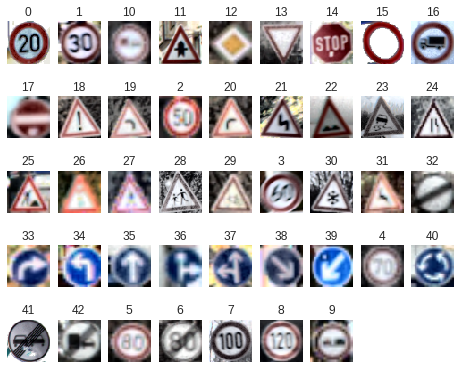

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
    #plt.imshow(train_signs[int(np.random.choice(indices, 1))])
plt.show()

In [0]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

In [0]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

## Assignment 3.2: Convolutional Neural Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU, BatchNormalization, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam, SGD

act = LeakyReLU(alpha=0.3)

cnn = Sequential()
# convolutional layers
cnn.add(Conv2D(filters=32, strides=(1, 1), kernel_size=(3, 3), padding='same', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3)))
cnn.add(Activation(act))

cnn.add(Conv2D(filters=32, strides=(1, 1), kernel_size=(3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation(act))

cnn.add(MaxPooling2D(pool_size=(2, 2))) # downscale


cnn.add(Conv2D(filters=64, strides=(1, 1), kernel_size=(3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation(act))

cnn.add(Conv2D(filters=64, strides=(1, 1), kernel_size=(3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation(act))

cnn.add(MaxPooling2D(pool_size=(2, 2))) # downscale

cnn.add(Conv2D(filters=128, strides=(1, 1), kernel_size=(3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation(act))

cnn.add(Conv2D(filters=128, strides=(1, 1), kernel_size=(3, 3), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation(act))

cnn.add(MaxPooling2D(pool_size=(2, 2))) # downscale

# dense layers
cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(BatchNormalization())
cnn.add(Activation(act))

cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

lr = 0.01
#opt = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

opt = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
activation_65 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_49 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
activation_66 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [0]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint


#def lr_schedule(epoch):
 # return lr * (0.1 ** int(epoch / 10))

data = cnn.fit(tr_signs, tr_labels, batch_size=32, epochs=30, verbose=2, validation_data=(va_signs, va_labels), callbacks=[tensorboard])

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Train on 600 samples, validate on 252 samples
Epoch 1/30
 - 2s - loss: 2.1002 - acc: 0.4700 - val_loss: 2.9179 - val_acc: 0.5278
Epoch 2/30
 - 1s - loss: 0.4655 - acc: 0.8750 - val_loss: 1.2444 - val_acc: 0.7183
Epoch 3/30
 - 1s - loss: 0.1384 - acc: 0.9767 - val_loss: 0.4637 - val_acc: 0.8651
Epoch 4/30
 - 1s - loss: 0.0475 - acc: 0.9950 - val_loss: 0.4068 - val_acc: 0.9127
Epoch 5/30
 - 1s - loss: 0.0209 - acc: 1.0000 - val_loss: 0.3620 - val_acc: 0.9246
Epoch 6/30
 - 1s - loss: 0.0129 - acc: 1.0000 - val_loss: 0.3434 - val_acc: 0.9206
Epoch 7/30
 - 1s - loss: 0.0114 - acc: 1.0000 - val_loss: 0.3603 - val_acc: 0.9008
Epoch 8/30
 - 1s - loss: 0.0082 - acc: 1.0000 - val_loss: 0.3564 - val_acc: 0.8968
Epoch 9/30
 - 1s - loss: 0.0064 - acc: 1.0000 - val_loss: 0.3535 - val_acc: 0.9087
Epoch 10/30
 - 1s - loss: 0.0058 - acc: 1.0000 - val_loss: 0.3548 - val_acc: 0.9008
Epoch 11/30
 - 1s - loss: 0.0052 - acc: 1.0000 - val_loss: 0.3487 - val_acc: 0.9008
Epoch 12/30
 - 1s - loss: 0.0052 - acc:

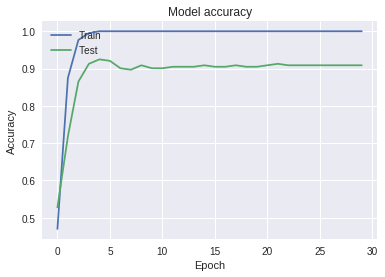

In [0]:
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

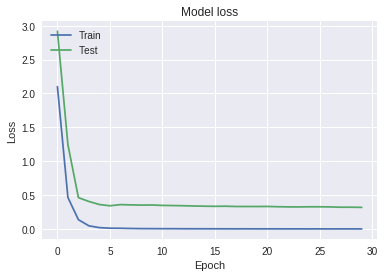

In [0]:
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

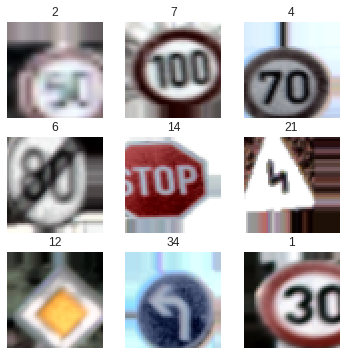

Epoch 1/30
 - 5s - loss: 0.0312 - acc: 0.9955 - val_loss: 0.3483 - val_acc: 0.9087
Epoch 2/30
 - 4s - loss: 0.0205 - acc: 0.9983 - val_loss: 0.2914 - val_acc: 0.9246
Epoch 3/30
 - 5s - loss: 0.0181 - acc: 0.9978 - val_loss: 0.2902 - val_acc: 0.9286
Epoch 4/30
 - 5s - loss: 0.0162 - acc: 0.9984 - val_loss: 0.2693 - val_acc: 0.9286
Epoch 5/30
 - 5s - loss: 0.0155 - acc: 0.9981 - val_loss: 0.3065 - val_acc: 0.9127
Epoch 6/30
 - 4s - loss: 0.0162 - acc: 0.9975 - val_loss: 0.2814 - val_acc: 0.9206
Epoch 7/30
 - 5s - loss: 0.0167 - acc: 0.9981 - val_loss: 0.2742 - val_acc: 0.9167
Epoch 8/30
 - 5s - loss: 0.0121 - acc: 0.9988 - val_loss: 0.2977 - val_acc: 0.9206
Epoch 9/30
 - 5s - loss: 0.0123 - acc: 0.9986 - val_loss: 0.2802 - val_acc: 0.9206
Epoch 10/30
 - 5s - loss: 0.0110 - acc: 0.9983 - val_loss: 0.2574 - val_acc: 0.9206
Epoch 11/30
 - 5s - loss: 0.0102 - acc: 0.9992 - val_loss: 0.2703 - val_acc: 0.9286
Epoch 12/30
 - 5s - loss: 0.0102 - acc: 0.9992 - val_loss: 0.2593 - val_acc: 0.9405
E

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, fill_mode='nearest')
datagen.fit(tr_signs, augment=True)

for x_batch, y_batch in datagen.flow(tr_signs, tr_labels, batch_size=9):
    # create a grid of 3x3 images
    fig = plt.figure(figsize=(6,6))
    for i in range(0, 9):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        ax.set_title(np.argmax(y_batch[i]))
        plt.imshow(cv2.cvtColor(x_batch[i], cv2.COLOR_BGR2RGB))
    # show the plot
    plt.show()
    break

train_steps = int(len(tr_signs) / 16)
valid_steps = int(len(va_signs) / 16)
data = cnn.fit_generator(datagen.flow(tr_signs, tr_labels, batch_size=128), epochs=30, steps_per_epoch=train_steps, verbose=2, validation_data=(va_signs, va_labels), validation_steps=valid_steps, callbacks=[tensorboard])

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

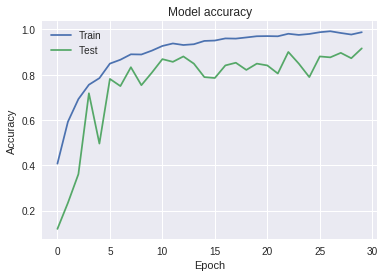

In [0]:
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

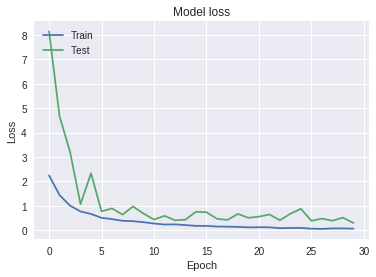

In [0]:
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()